## Setup

In [1]:
import gym
import numpy as np
import time
import matplotlib.pyplot as plt
import torch
import argparse
from pdb import set_trace as debug

from utils import generate_paths, get_expert_data, PolicyGaussian, PolicyAutoRegressiveModel
from bc import simulate_policy_bc
from dagger import simulate_policy_dagger
import pytorch_utils as ptu
from evaluate import evaluate
from reach_goal.envs.pointmaze_env import PointMazeEnv
from reach_goal.envs.pointmaze_expert import WaypointController
import analysis

torch.manual_seed(0)
import random
random.seed(0)
np.random.seed(0)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('using device', device)

pybullet build time: May 20 2022 19:44:17


using device cuda


In [3]:
# Allow notebook to update code from analysis.py without restarting kernel
import importlib
importlib.reload(analysis)

<module 'analysis' from '/home/samuelbuckner/code/cse542_hw1/analysis.py'>

## Analysis: Part 2

In [2]:
losses_reacher, success_rates_reacher, avg_return_reacher = analysis.train_and_evaluate('reacher', 'behavior_cloning', 'gaussian', device=device)
losses_pntmaze, success_rates_pntmaze, avg_return_pntmaze = analysis.train_and_evaluate('pointmaze', 'behavior_cloning', 'gaussian', device=device)

Imported Expert data successfully
[0] loss: 35.62811012
[1] loss: 18.00330353
[2] loss: -3.41626105
[3] loss: 4.70273139
[4] loss: 100.29633951
[5] loss: 24.61388540
[6] loss: 38.54436445
[7] loss: 0.48083208
[8] loss: 0.36589470
[9] loss: 2.29142673
[10] loss: -0.21420860
[11] loss: -3.65964441
[12] loss: -7.06736565
[13] loss: -11.01370807
[14] loss: -14.06741328
[15] loss: -18.66116695
[16] loss: -12.05089169
[17] loss: 11.37284622
[18] loss: 17.91484375
[19] loss: 3.77504241
[20] loss: -15.90649362
[21] loss: -12.34844985
[22] loss: -17.77401075
[23] loss: -21.38290057
[24] loss: -28.02936497
[25] loss: -32.86752853
[26] loss: -35.47720108
[27] loss: -44.91803932
[28] loss: -45.70359154
[29] loss: -44.92407322
[30] loss: -46.22915878
[31] loss: -9.79666824
[32] loss: -25.17828884
[33] loss: 0.05602436
[34] loss: -28.53542728
[35] loss: -33.66779938
[36] loss: -35.29707642
[37] loss: -40.11593742
[38] loss: -45.59782448
[39] loss: -51.91975822
[40] loss: -60.91801605
[41] loss: -63.

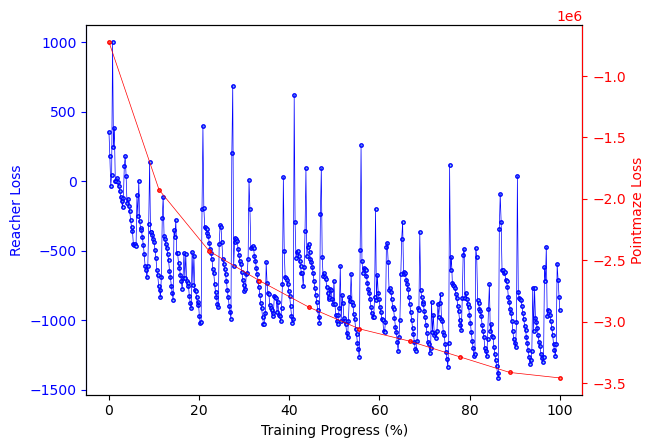

=== Reacher ===
 Success rate: 0.26
 Average return: -11.035469343648975
=== PointMaze ===
 Success rate: 0.9
 Average return: 0.9


In [3]:
analysis.plot_compare_reacher_pointmaze(
    np.linspace(0,100,len(losses_reacher)), 
    losses_reacher, 
    np.linspace(0,100,len(losses_pntmaze)), 
    losses_pntmaze)
print('=== Reacher ===')
print(' Success rate:', success_rates_reacher)
print(' Average return:', avg_return_reacher)
print('=== PointMaze ===')
print(' Success rate:', success_rates_pntmaze)
print(' Average return:', avg_return_pntmaze)

In [6]:
batch_sweep = [16,32,64,128,256]
# batch_sweep = [16,32]
success_rates_reacher = []
avg_returns_reacher = []
success_rates_pntmaze = []
avg_returns_pntmaze = []
for batch_size in batch_sweep:
    _, success_rate_reacher, avg_return_reacher = analysis.train_and_evaluate('reacher', 'behavior_cloning', 'gaussian', batch_size=batch_size, device=device)
    _, success_rate_pntmaze, avg_return_pntmaze = analysis.train_and_evaluate('pointmaze', 'behavior_cloning', 'gaussian', batch_size=batch_size, device=device)
    success_rates_reacher.append(success_rate_reacher)
    avg_returns_reacher.append(avg_return_reacher)
    success_rates_pntmaze.append(success_rate_pntmaze)
    avg_returns_pntmaze.append(avg_return_pntmaze)

Imported Expert data successfully
[0] loss: 35.56972733
[1] loss: 4.27850186
[2] loss: 0.04777932
[3] loss: 68.16522541
[4] loss: -4.93314278
[5] loss: -17.49151783
[6] loss: -25.02574444
[7] loss: 25.98629618
[8] loss: 0.66465554
[9] loss: -20.29589911
[10] loss: -22.81717491
[11] loss: -32.81525888
[12] loss: -42.63828316
[13] loss: -18.98191833
[14] loss: -14.97789364
[15] loss: -37.61029091
[16] loss: -45.96470680
[17] loss: -53.95295296
[18] loss: -59.03316116
[19] loss: -38.42927256
[20] loss: -42.47562599
[21] loss: -51.52479458
[22] loss: -15.88380570
[23] loss: -42.18577557
[24] loss: -51.91637096
[25] loss: -59.48668613
[26] loss: -68.90588875
[27] loss: -66.51956339
[28] loss: -52.81209927
[29] loss: -47.47864499
[30] loss: -51.15921326
[31] loss: -57.78936501
[32] loss: -70.91333809
[33] loss: -78.53281174
[34] loss: -81.47900028
[35] loss: -33.98464241
[36] loss: -49.74945040
[37] loss: -46.47110155
[38] loss: -55.29992542
[39] loss: -64.33263798
[40] loss: -73.79295616
[4

[78] loss: -80.00027809
[79] loss: -91.25345993
[80] loss: -53.74488907
[81] loss: -4.19223080
[82] loss: -47.76720524
[83] loss: -49.18455315
[84] loss: -56.57201538
[85] loss: -66.67207317
[86] loss: -76.17031937
[87] loss: -85.89204369
[88] loss: -16.60901785
[89] loss: -40.83917656
[90] loss: -47.75922785
[91] loss: -52.26313725
[92] loss: -61.30688324
[93] loss: -73.96405983
[94] loss: -88.60608177
[95] loss: -98.81942787
[96] loss: 41.64587345
[97] loss: -38.76073465
[98] loss: -37.91557570
[99] loss: -41.13821855
[100] loss: -47.41015453
[101] loss: -56.12358367
[102] loss: -67.16815867
[103] loss: -78.21350174
[104] loss: -85.97252245
[105] loss: -38.20244446
[106] loss: -41.31095343
[107] loss: -42.84868393
[108] loss: -59.43504505
[109] loss: -64.43195162
[110] loss: -75.54559460
[111] loss: -81.79177217
[112] loss: -72.76024876
[113] loss: -54.47391834
[114] loss: -77.11033878
[115] loss: -81.22023735
[116] loss: -85.07328625
[117] loss: -91.01215973
[118] loss: -93.36810875

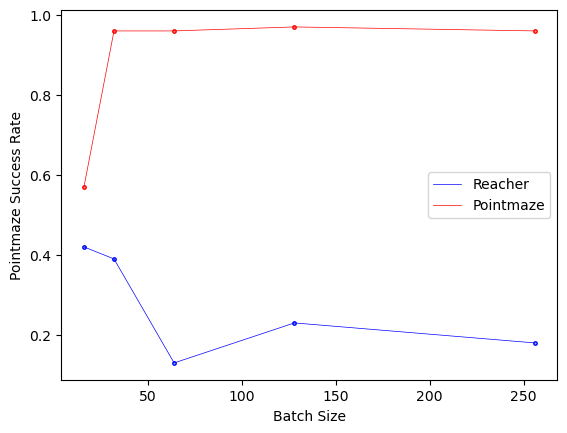

In [8]:
analysis.plot_compare_reacher_pointmaze(
    batch_sweep, 
    success_rates_reacher, 
    batch_sweep, 
    success_rates_pntmaze,
    xlabel='Batch Size',
    ylabel='Success Rate',
    twinx=False)

In [ ]:
analysis.plot_compare_reacher_pointmaze(
    batch_sweep, 
    avg_returns_reacher, 
    batch_sweep, 
    avg_returns_pntmaze,
    xlabel='Batch Size',
    ylabel='Average Return',
    twinx=False)

## Analysis: Part 3

In [4]:
losses_reacher, success_rates_reacher, avg_return_reacher = analysis.train_and_evaluate('reacher', 'dagger', 'gaussian', device=device)
losses_pntmaze, success_rates_pntmaze, avg_return_pntmaze = analysis.train_and_evaluate('pointmaze', 'dagger', 'gaussian', device=device)

Imported Expert data successfully
Expert policy loaded
[0] loss: 30.57076168
[1] loss: 6.12777364
[2] loss: -16.75688925
[3] loss: -16.05308640
[4] loss: -13.90545840
[5] loss: -15.88592319
[6] loss: -24.54288330
[7] loss: -30.85185051
[8] loss: -41.92775345
[9] loss: -47.81926651
[10] loss: -55.48180122
[11] loss: -57.95589828
[12] loss: -56.35388985
[13] loss: -60.05111389
[14] loss: -64.53046188
[15] loss: -66.56257324
[16] loss: -69.49412766
[17] loss: -71.69676971
[18] loss: -77.21947632
[19] loss: -83.56915054
[20] loss: -70.42131500
[21] loss: -53.44934092
[22] loss: -61.23347626
[23] loss: -61.87637405
[24] loss: -67.21592331
[25] loss: -76.83577576
[26] loss: -89.11421814
[27] loss: -97.56365204
[28] loss: -99.06314011
[29] loss: -105.47532043
[30] loss: -58.12213650
[31] loss: -77.93471756
[32] loss: -75.00408020
[33] loss: -78.92361069
[34] loss: -87.35908890
[35] loss: -95.22962112
[36] loss: -74.80218191
[37] loss: -36.59893513
[38] loss: -74.17305222
[39] loss: -80.283634

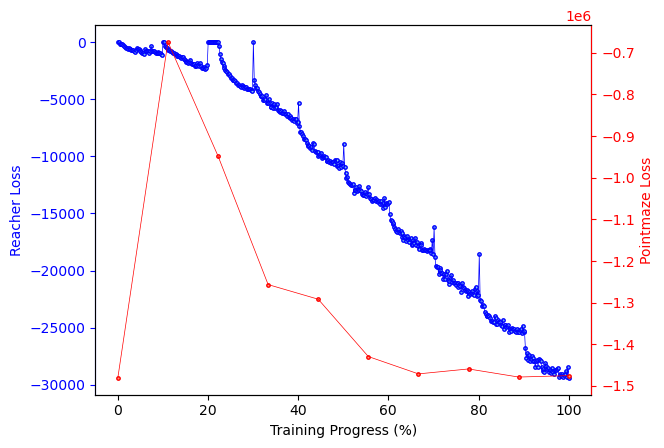

=== Reacher ===
 Success rate: [0.42, 0.39, 0.13, 0.23, 0.18]
 Average return: -198.56357741506494
=== PointMaze ===
 Success rate: [0.57, 0.96, 0.96, 0.97, 0.96]
 Average return: 0.96


In [7]:
analysis.plot_compare_reacher_pointmaze(
    np.linspace(0,100,len(losses_reacher)), 
    np.clip(losses_reacher, -1e6, 1e1), 
    np.linspace(0,100,len(losses_pntmaze)), 
    losses_pntmaze)
print('=== Reacher ===')
print(' Success rate:', success_rates_reacher)
print(' Average return:', avg_return_reacher)
print('=== PointMaze ===')
print(' Success rate:', success_rates_pntmaze)
print(' Average return:', avg_return_pntmaze)

In [7]:
dagger_trajs_sweep = [5,10,50,100]
success_rates_reacher = []
avg_returns_reacher = []
success_rates_pntmaze = []
avg_returns_pntmaze = []
for trajc in dagger_trajs_sweep:
    _, success_rate_reacher, avg_return_reacher = analysis.train_and_evaluate('reacher', 'dagger', 'gaussian', num_trajs_per_dagger=trajc, device=device)
    _, success_rate_pntmaze, avg_return_pntmaze = analysis.train_and_evaluate('pointmaze', 'dagger', 'gaussian', num_trajs_per_dagger=trajc, device=device)
    success_rates_reacher.append(success_rate_reacher)
    avg_returns_reacher.append(avg_return_reacher)
    success_rates_pntmaze.append(success_rate_pntmaze)
    avg_returns_pntmaze.append(avg_return_pntmaze)    

Imported Expert data successfully
Expert policy loaded
[0] loss: 35.08180504
[1] loss: 15.69202728
[2] loss: -7.16539378
[3] loss: -10.38469210
[4] loss: -15.35069065
[5] loss: -13.58785648
[6] loss: -20.61805887
[7] loss: -28.50367203
[8] loss: -34.22546158
[9] loss: -38.79710197
[10] loss: -14.92824869
[11] loss: -29.57733250
[12] loss: -43.61191978
[13] loss: -47.30728531
[14] loss: -52.08721161
[15] loss: -57.22924385
[16] loss: -48.37647171
[17] loss: -55.67738800
[18] loss: -62.27840500
[19] loss: -66.95549011
[20] loss: -73.73686295
[21] loss: -77.66649017
[22] loss: -74.23587341
[23] loss: -71.45820236
[24] loss: -80.90086594
[25] loss: -87.61465149
[26] loss: -89.10778122
[27] loss: -98.42161865
[28] loss: -97.85529633
[29] loss: -100.73229141
[30] loss: -99.45986938
[31] loss: -102.55803986
[32] loss: -100.73356628
[33] loss: -103.35033417
[34] loss: -102.99484863
[35] loss: -101.90854797
[36] loss: -106.54924774
[37] loss: -107.06302490
[38] loss: -109.93950653
[39] loss: -1

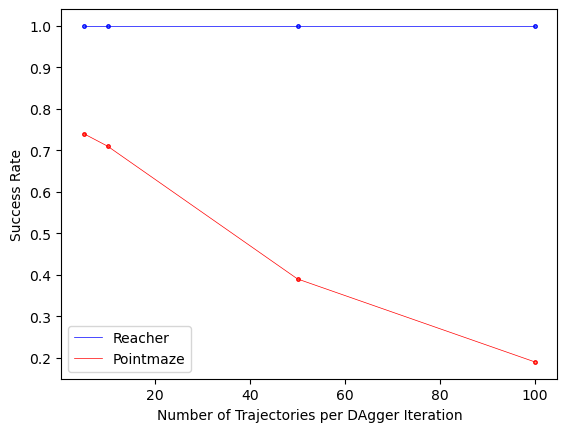

In [8]:
analysis.plot_compare_reacher_pointmaze(
    dagger_trajs_sweep, 
    success_rates_reacher, 
    dagger_trajs_sweep, 
    success_rates_pntmaze,
    xlabel='Number of Trajectories per DAgger Iteration',
    ylabel='Success Rate',
    twinx=False)

In [8]:
analysis.plot_compare_reacher_pointmaze(
    dagger_trajs_sweep, 
    avg_return_reacher, 
    dagger_trajs_sweep, 
    avg_return_pntmaze,
    xlabel='Number of Trajectories per DAgger Iteration',
    ylabel='Average Return',
    twinx=False)

NameError: name 'dagger_trajs_sweep' is not defined

## Analysis: Part 4

In [2]:
losses_reacher, success_rates_reacher, avg_return_reacher = analysis.train_and_evaluate('reacher', 'behavior_cloning', 'autoregressive', device=device)
losses_pntmaze, success_rates_pntmaze, avg_return_pntmaze = analysis.train_and_evaluate('pointmaze', 'behavior_cloning', 'autoregressive', device=device)

Imported Expert data successfully
[0] loss: 102.20819397
[1] loss: 88.85300064
[2] loss: 77.14504852
[3] loss: 64.22798119
[4] loss: 55.83901939
[5] loss: 49.23553429
[6] loss: 46.01849365
[7] loss: 42.71403904
[8] loss: 40.10569801
[9] loss: 36.78384552
[10] loss: 35.65922508
[11] loss: 33.64606876
[12] loss: 32.23998222
[13] loss: 30.73210201
[14] loss: 30.03444977
[15] loss: 29.11476250
[16] loss: 27.77640438
[17] loss: 26.65267706
[18] loss: 26.01730614
[19] loss: 25.74306259
[20] loss: 24.68065710
[21] loss: 23.92492647
[22] loss: 23.14062099
[23] loss: 22.52068629
[24] loss: 21.87756944
[25] loss: 21.65003328
[26] loss: 20.85794926
[27] loss: 20.80707932
[28] loss: 19.81796227
[29] loss: 19.30447931
[30] loss: 19.01588736
[31] loss: 18.53596830
[32] loss: 17.91254463
[33] loss: 17.45261879
[34] loss: 17.58809404
[35] loss: 16.60612373
[36] loss: 16.84249964
[37] loss: 16.77455616
[38] loss: 15.51931596
[39] loss: 15.37361069
[40] loss: 15.06155512
[41] loss: 14.58097682
[42] loss

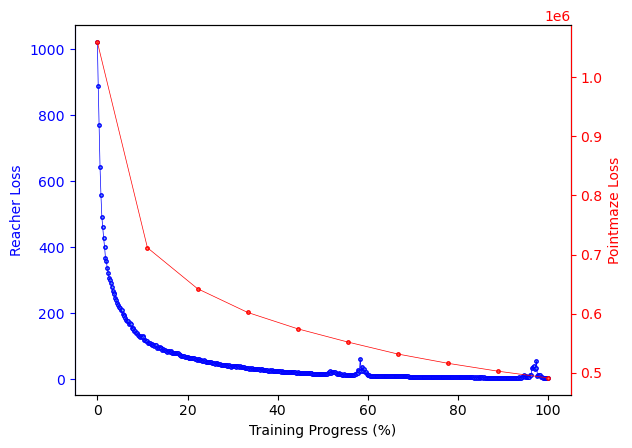

=== Reacher ===
 Success rate: 0.24
 Average return: -8.988648436723961
=== PointMaze ===
 Success rate: 0.82
 Average return: 0.82


In [4]:
analysis.plot_compare_reacher_pointmaze(
    np.linspace(0,100,len(losses_reacher)), 
    losses_reacher, 
    np.linspace(0,100,len(losses_pntmaze)), 
    losses_pntmaze)
print('=== Reacher ===')
print(' Success rate:', success_rates_reacher)
print(' Average return:', avg_return_reacher)
print('=== PointMaze ===')
print(' Success rate:', success_rates_pntmaze)
print(' Average return:', avg_return_pntmaze)

In [5]:
losses_reacher, success_rates_reacher, avg_return_reacher = analysis.train_and_evaluate('reacher', 'dagger', 'autoregressive', device=device)
losses_pntmaze, success_rates_pntmaze, avg_return_pntmaze = analysis.train_and_evaluate('pointmaze', 'dagger', 'autoregressive', device=device)

Imported Expert data successfully
Expert policy loaded
[0] loss: 95.65110626
[1] loss: 79.31112137
[2] loss: 63.40035858
[3] loss: 51.70652618
[4] loss: 47.21223412
[5] loss: 41.98354187
[6] loss: 37.79385834
[7] loss: 34.94097595
[8] loss: 31.65632248
[9] loss: 29.42481709
[10] loss: 27.78054390
[11] loss: 26.70065117
[12] loss: 24.68316650
[13] loss: 24.56356144
[14] loss: 23.64490051
[15] loss: 22.05224266
[16] loss: 21.34364719
[17] loss: 19.82277355
[18] loss: 20.25786896
[19] loss: 19.82246971
[20] loss: 17.98819847
[21] loss: 17.50348206
[22] loss: 18.31134682
[23] loss: 16.40314636
[24] loss: 16.15097828
[25] loss: 16.77197132
[26] loss: 15.25441875
[27] loss: 15.60305414
[28] loss: 14.60271645
[29] loss: 14.30475731
[30] loss: 13.99657707
[31] loss: 14.07461634
[32] loss: 13.64200249
[33] loss: 13.82088728
[34] loss: 12.68967409
[35] loss: 12.57052050
[36] loss: 12.17914238
[37] loss: 11.60348101
[38] loss: 12.00714126
[39] loss: 11.92482777
[40] loss: 11.69418812
[41] loss: 1

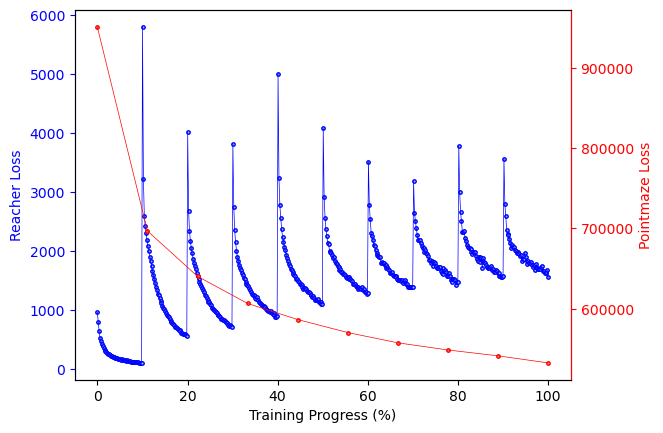

=== Reacher ===
 Success rate: 0.99
 Average return: -4.3627949141802675
=== PointMaze ===
 Success rate: 0.87
 Average return: 0.87


In [6]:
analysis.plot_compare_reacher_pointmaze(
    np.linspace(0,100,len(losses_reacher)), 
    losses_reacher, 
    np.linspace(0,100,len(losses_pntmaze)), 
    losses_pntmaze)
print('=== Reacher ===')
print(' Success rate:', success_rates_reacher)
print(' Average return:', avg_return_reacher)
print('=== PointMaze ===')
print(' Success rate:', success_rates_pntmaze)
print(' Average return:', avg_return_pntmaze)